## Exercise 1

Builds a MRF, with 5 binary values with the values of +1 or -1, connections given from the questions provide dependencies, each clique gets provided with the local function, which provides a higher weight to the configurations where the variable signs match the index.

the combination of all these local functions is the creation of the joint distribution, lastly we find the most probable configuration of which maximizes the joint probability

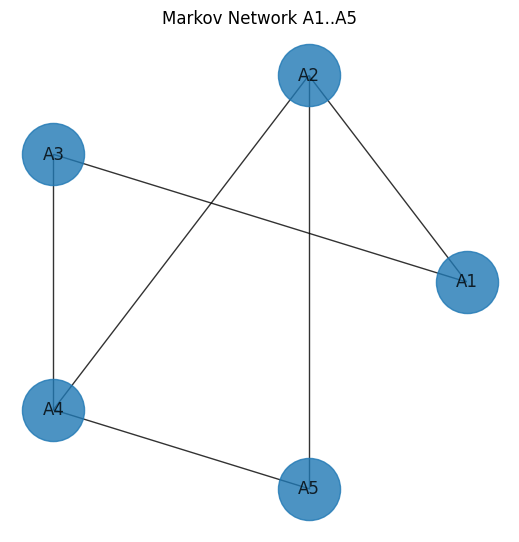

Cliques (maximal):
  ('A1', 'A2')
  ('A1', 'A3')
  ('A2', 'A4', 'A5')
  ('A3', 'A4')

MAP configuration:
  (1, 1, 1, 1, 1)


In [17]:
import math
from itertools import product
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor

nodesList = ["A1","A2","A3","A4","A5"]
edgesList = [("A1","A2"),("A1","A3"),("A2","A4"),("A2","A5"),("A3","A4"),("A4","A5")]

model = MarkovNetwork(edgesList)

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
pos = nx.circular_layout(model)
plt.figure(figsize=(5,5))
nx.draw(model, with_labels=True, pos=pos, alpha=0.8, node_size=2000)
plt.axis("off")
plt.title("Markov Network A1..A5")
plt.show()

maximalCliques = sorted(tuple(sorted(c)) for c in nx.find_cliques(model))
print("Cliques (maximal):")
for clique in maximalCliques:
    print(" ", clique)

indexToValue = {0:-1, 1:+1}

def VariableIndex(varName):
    return int(varName[1:])

def CliquePotentialValues(varList):
    values = []
    for indexTuple in product([0,1], repeat=len(varList)):
        assignVals = {v: indexToValue[i] for v,i in zip(varList, indexTuple)}
        exponent = sum(VariableIndex(v)*assignVals[v] for v in varList)
        values.append(math.exp(exponent))
    return values

factorsList = []
for clique in maximalCliques:
    varList = list(clique)
    cardinalityList = [2]*len(varList)
    values = CliquePotentialValues(varList)
    factor = DiscreteFactor(variables=varList, cardinality=cardinalityList, values=values)
    factorsList.append(factor)
model.add_factors(*factorsList)

def LogUnnormalizedAt(assignmentIdxTuple):
    assignVals = {v: indexToValue[i] for v,i in zip(nodesList, assignmentIdxTuple)}
    s = 0.0
    for clique in maximalCliques:
        s += sum(VariableIndex(v)*assignVals[v] for v in clique)
    return s

allAssignmentsIdx = list(product([0,1], repeat=len(nodesList)))
logVals = [LogUnnormalizedAt(a) for a in allAssignmentsIdx]
m = max(logVals)
logZ = m + math.log(sum(math.exp(L-m) for L in logVals))
probs = [math.exp(L-logZ) for L in logVals]
order = sorted(range(len(allAssignmentsIdx)), key=lambda i: probs[i], reverse=True)
best = order[0]
bestVals = tuple(indexToValue[j] for j in allAssignmentsIdx[best])

print("\nMAP configuration:")
print(" ", bestVals)